In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [3]:
ds = pd.read_csv('spam_ham_dataset.csv')
ds

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
def data_set():
    spam_df  = pd.read_csv('spam_ham_dataset.csv')
    return spam_df.drop('Unnamed: 0',axis=1)

In [5]:
data = data_set()
data

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
data.shape

(5171, 3)

In [7]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
data.tail()

,label,text,label_num
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0
5170,spam,Subject: important online banking alert\r\ndea...,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [10]:
data.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


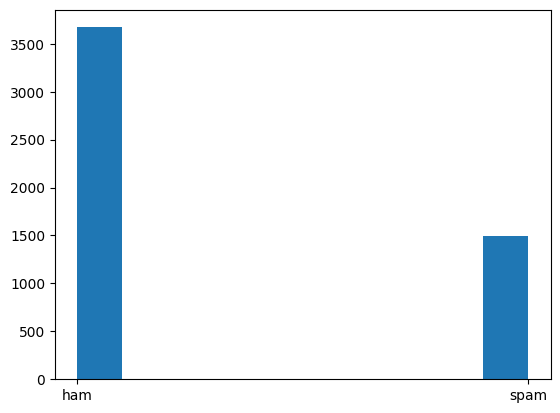

In [11]:
plt.hist(data['label'])
plt.show()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(data['text'])

In [13]:
label=data['label_num']
X=spamham_countVectorizer
y=label

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       735
           1       0.98      0.96      0.97       300

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

The Accuracy is 0.9826086956521739


<Axes: >

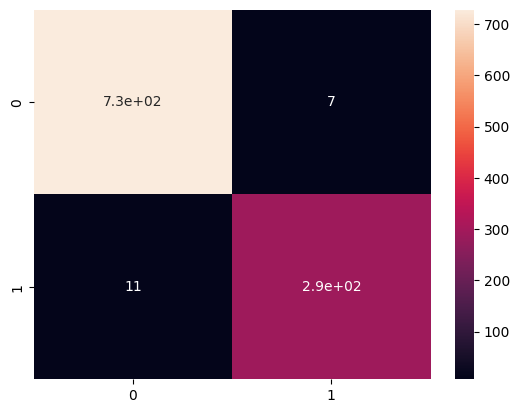

In [15]:
#Naive Bayes

NB_classifier=MultinomialNB()
NB_classifier.fit(X,y)
Y_pred=NB_classifier.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))
print("The Accuracy is",accuracy_score(Y_test,Y_pred))
sns.heatmap(cm,annot=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       735
           1       0.95      0.96      0.95       300

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

The Accuracy is  0.9729468599033816


<Axes: >

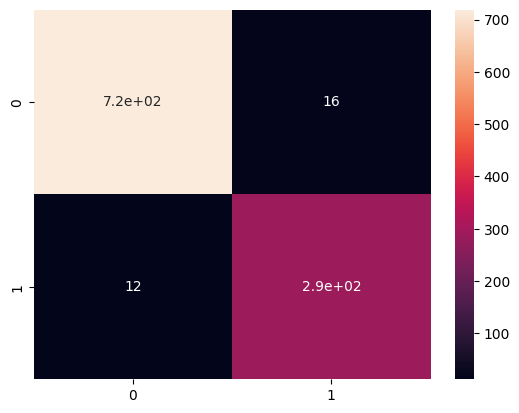

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(C=10.0)
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
confusion_matrix(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))
print("The Accuracy is ",accuracy_score(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       735
           1       0.62      0.98      0.76       300

    accuracy                           0.82      1035
   macro avg       0.81      0.87      0.81      1035
weighted avg       0.88      0.82      0.83      1035



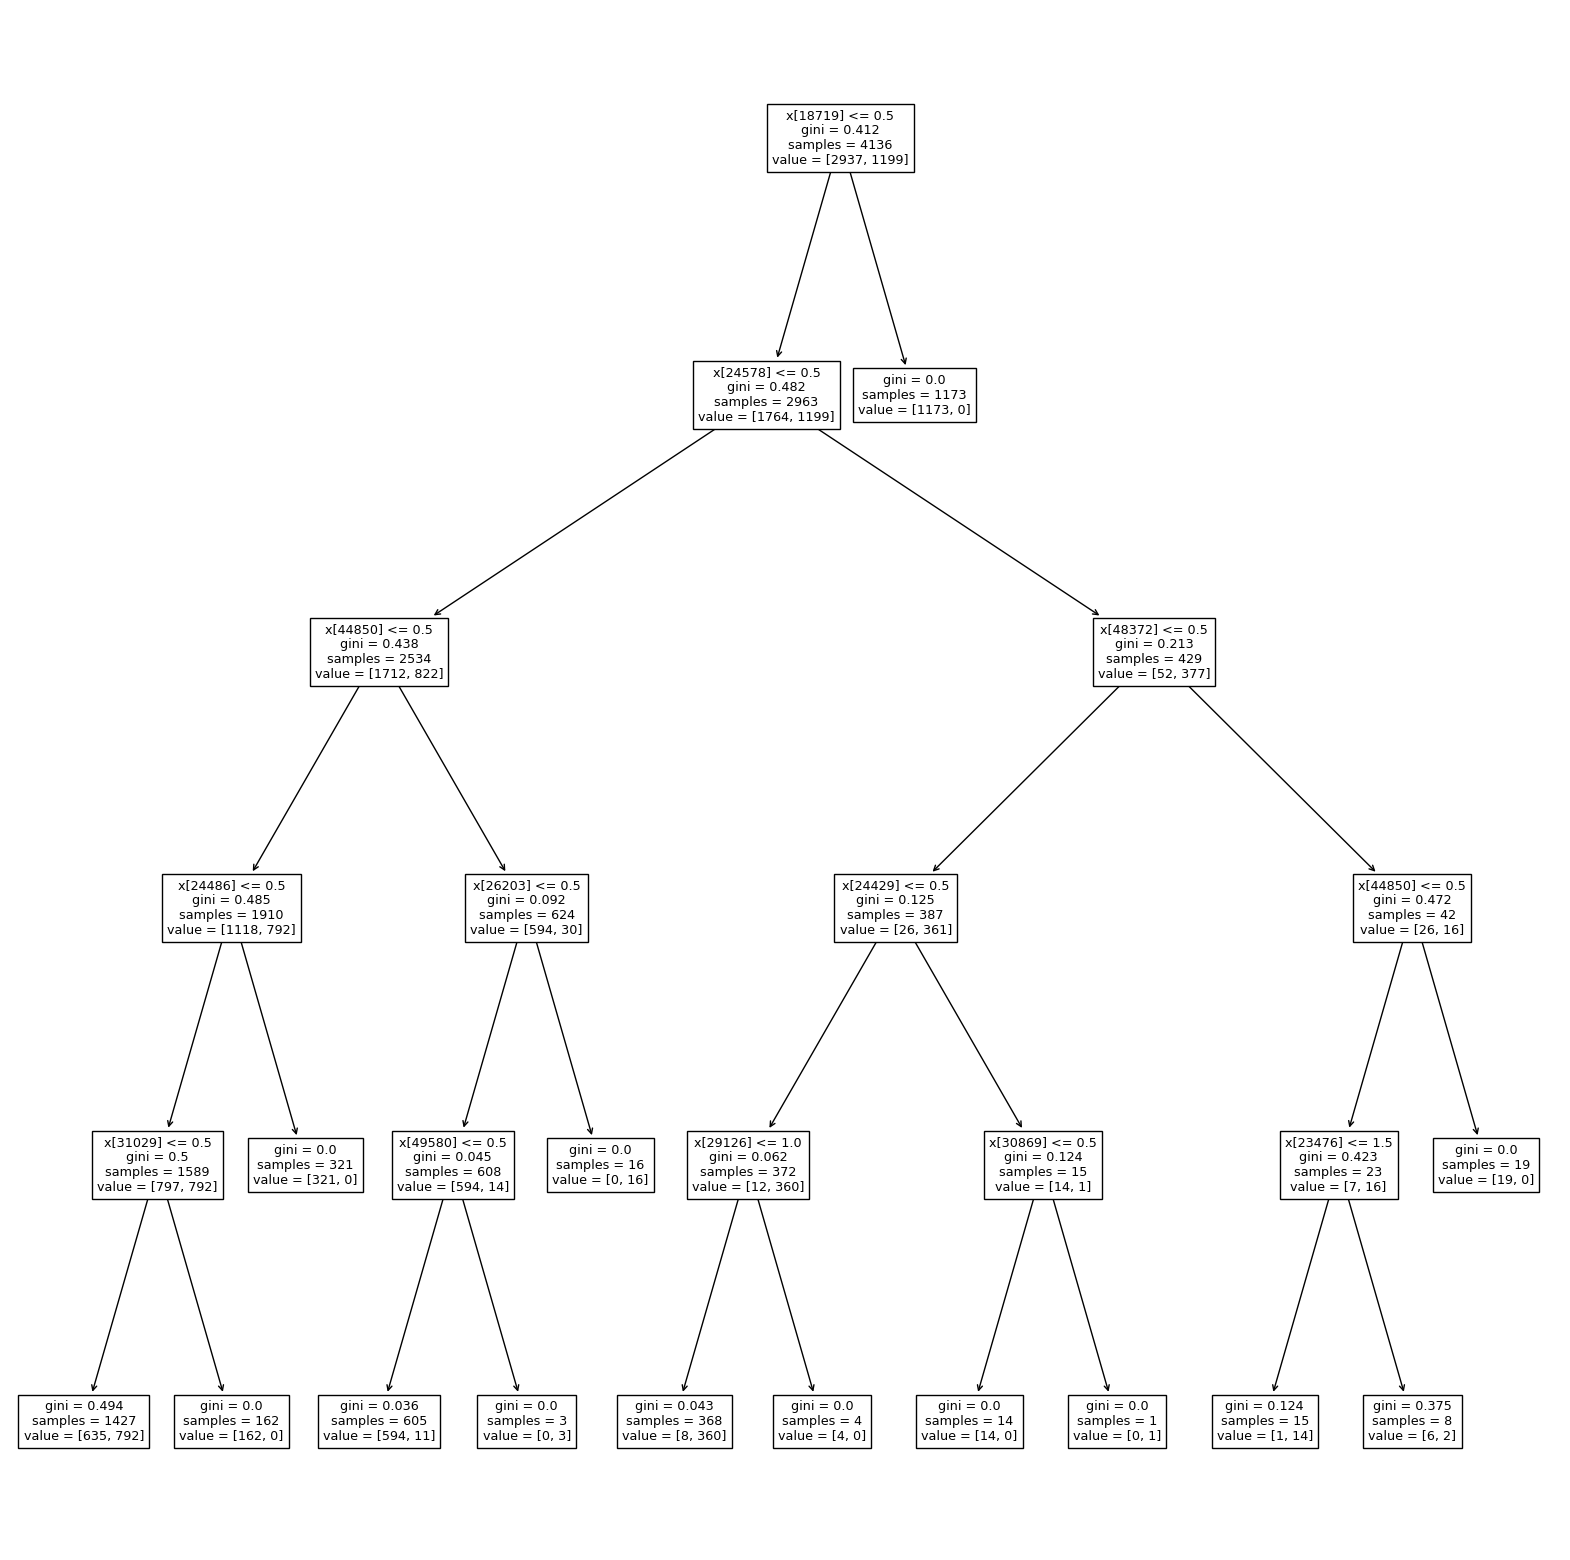

The Accuracy is 0.8222222222222222


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)
print(classification_report(Y_test,Y_pred))
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,Y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dt)
plt.show()
print("The Accuracy is",accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       735
           1       0.73      0.92      0.81       300

    accuracy                           0.88      1035
   macro avg       0.84      0.89      0.86      1035
weighted avg       0.89      0.88      0.88      1035

The Accuracy is 0.8763285024154589


<Axes: >

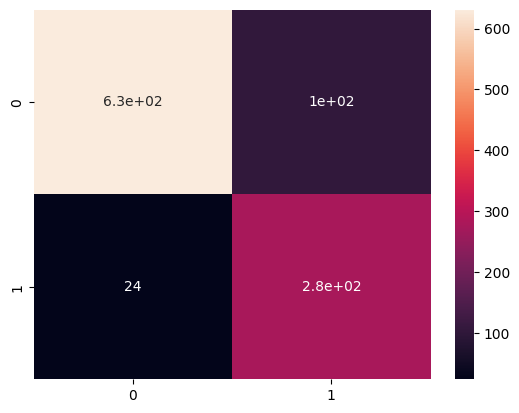

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
Y_pred=neigh.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("The Accuracy is",accuracy_score(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot = True)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       735
           1       0.94      0.94      0.94       300

    accuracy                           0.96      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.96      0.96      0.96      1035

The Accuracy is 0.9632850241545894


<Axes: >

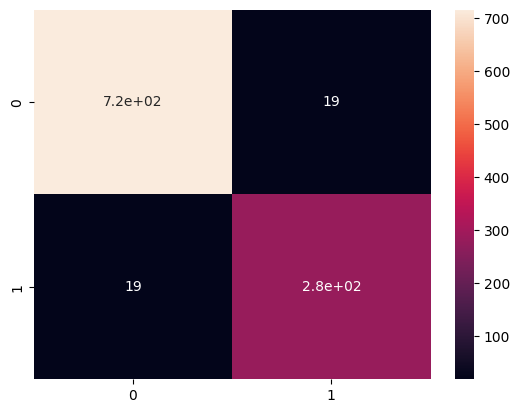

In [19]:
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("The Accuracy is",accuracy_score(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot = True)

The Accuracy Score is 0.9632850241545894


<Axes: >

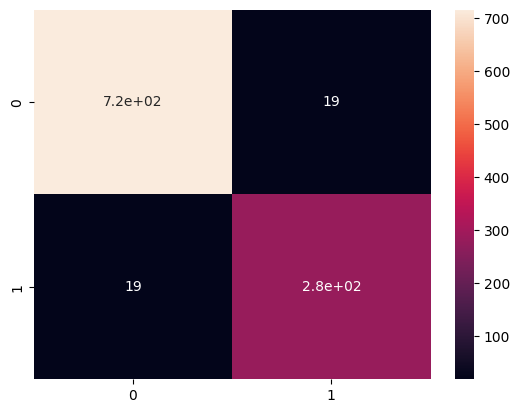

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,min_samples_split=2,max_depth=10,max_features=7)
rf=rf.fit(X_train,Y_train)
cross_val_score(rf,X_train,Y_train,cv=10).mean()
print("The Accuracy Score is",accuracy_score(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot = True)

In [21]:
def check(text):
    a= []
    df =data_set() 
    X = df['text']
    y = df['label_num']
    vectorizer=CountVectorizer()
    X = vectorizer.fit_transform(X)
    new_email_features = vectorizer.transform([text])
    
    model = MultinomialNB()
    model.fit(X, y)
    prediction = model.predict(new_email_features)
    a.append(prediction[0])
    
    dt=DecisionTreeClassifier(max_depth=5)
    dt.fit(X,y)
    prediction = dt.predict(new_email_features)
    a.append(prediction[0])
    
    lr=LogisticRegression(C=10.0)
    lr.fit(X,y)
    prediction = lr.predict(new_email_features)
    a.append(prediction[0])
    
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X,y)
    prediction = neigh.predict(new_email_features)
    a.append(prediction[0])
    
    model=svm.SVC(kernel='linear')
    model.fit(X,y)
    prediction=model.predict(new_email_features)
    a.append(prediction[0])
    
    
    if a.count(0) < a.count(1):
        return "The email is spam!"
    else:
        return "The email is not spam." 

In [22]:
app1 = gr.Interface(fn=data_set,inputs=None, outputs=gr.Dataframe(),description="Reading csv")
app3 = gr.Interface(fn=check, inputs='text', outputs='text',description=" result")
demo = gr.TabbedInterface([app1, app3], ["Reading_csv", "result"])
demo.launch()

/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:897: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [23]:
#Without GUI

In [24]:
text = input("Enter the Mail :")
a= []
df =data_set() 
X = df['text']
y = df['label_num']
vectorizer=CountVectorizer()
X = vectorizer.fit_transform(X)
new_email_features = vectorizer.transform([text])

model = MultinomialNB()
model.fit(X, y)
prediction = model.predict(new_email_features)
a.append(prediction[0])
print("The Predction of NB is ",prediction[0])

dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X,y)
prediction = dt.predict(new_email_features)
a.append(prediction[0])
print("The Predction of DTree is ",prediction[0])


lr=LogisticRegression(C=10.0)
lr.fit(X,y)
prediction = lr.predict(new_email_features)
a.append(prediction[0])
print("The Predction of LR is ",prediction[0])


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
prediction = neigh.predict(new_email_features)
a.append(prediction[0])
print("The Predction of Knn is ",prediction[0])


model=svm.SVC(kernel='linear')
model.fit(X,y)
prediction=model.predict(new_email_features)
a.append(prediction[0])
print("The Predction of svm is ",prediction[0])

if a.count(0) < a.count(1):
    print("The email is spam!")
else:
    print("The email is not spam." )

Enter the Mail :
The Predction of NB is  0
The Predction of DTree is  1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Predction of LR is  1
The Predction of Knn is  1
The Predction of svm is  1
[1]
The email is spam!
